# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(15)

In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [3]:
df = pd.read_csv("BA_reviews.csv")

In [4]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Not Verified | ', '', regex=False)

# To check the result
print(df[['reviews']].head())

                                             reviews
0     British Airways World Traveller Plus (Premi...
1     BA is barely a step above low cost airlines...
2   Happy with the flight crew. Hadn't been on a ...
3     Horrible service from boarding to landing. ...
4   My wife and I are very disappointed with flyi...


In [21]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [6]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply VADER to calculate sentiment scores
df['sentiment_scores'] = df['reviews'].apply(lambda review: sid.polarity_scores(review))

# Extract the compound score
df['compound'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

In [7]:
import matplotlib.pyplot as plt

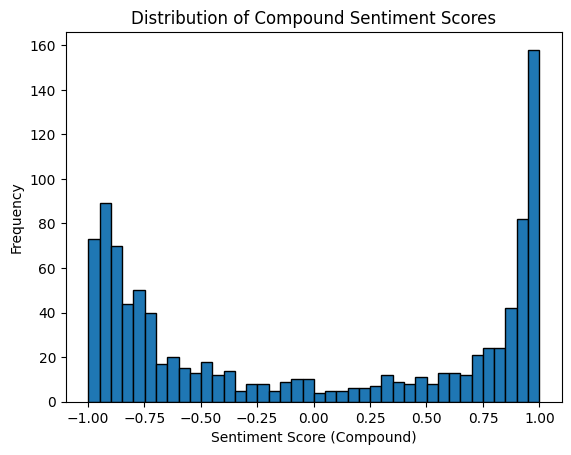

In [8]:
# Histogram for compound sentiment scores
plt.hist(df['compound'], bins=40, edgecolor='black')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.show()

In [9]:
import seaborn as sns

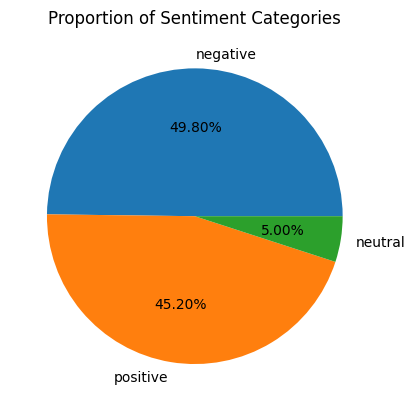

In [36]:
# Create sentiment categories
df['sentiment_category'] = df['compound'].apply(lambda x: 'positive' if x > 0.18 else ('negative' if x < -0.18 else 'neutral'))
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_num'] = df['sentiment_category'].map(sentiment_mapping)

# Pie chart for sentiment categories
df['sentiment_category'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Proportion of Sentiment Categories')
plt.ylabel('')
plt.show()

In [17]:
from wordcloud import WordCloud
from collections import Counter

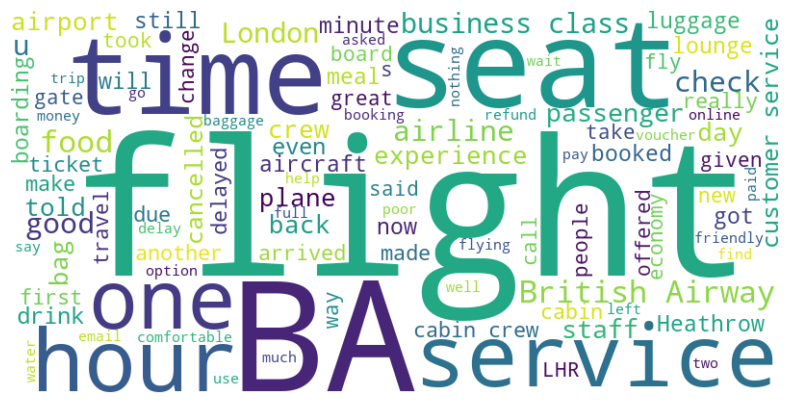

In [13]:
all_reviews = " ".join(df['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
# Get the stop words list
stop_words = set(stopwords.words('english'))
stop_words.update({'would', 'british', 'airways', 'ba', 'get', 'us'})

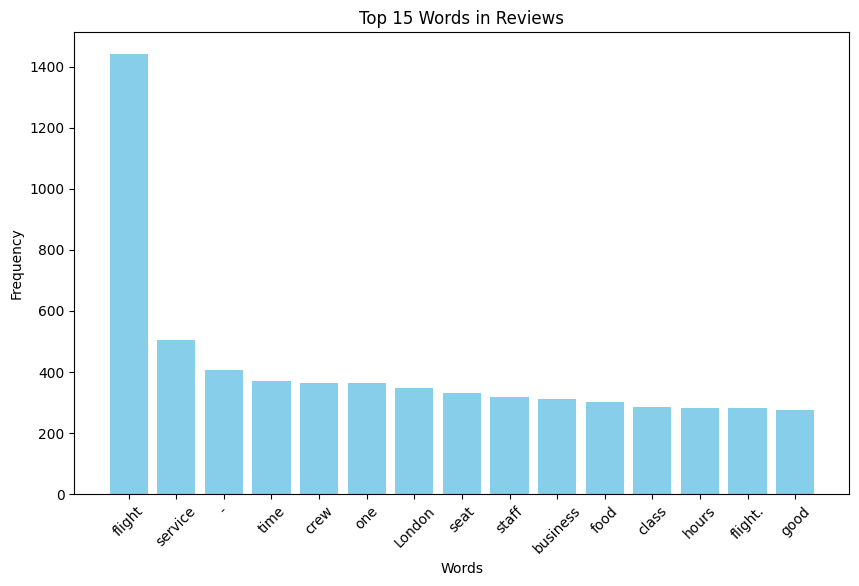

In [35]:
# Tokenize the words in the reviews (basic splitting by whitespace)
words = all_reviews.split()

# Remove stop words
filtered_words = [word for word in words if word.lower() not in stop_words]

# Combine filtered words back into a single string for the word cloud
filtered_reviews = " ".join(filtered_words)

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the most common words 
most_common_words = word_counts.most_common(15)

# Separate the words and their counts for plotting
words, counts = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 15 Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

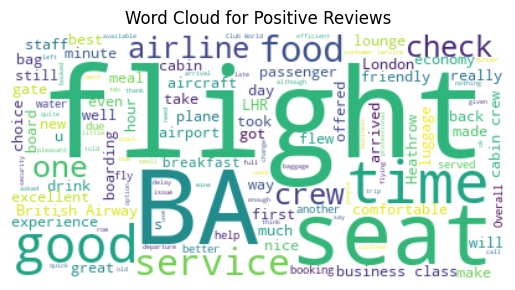

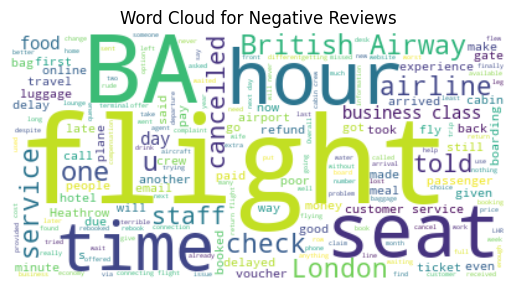

In [11]:
# Generate word clouds for positive and negative reviews
positive_reviews = ' '.join(df[df['sentiment_category'] == 'positive']['reviews'])
negative_reviews = ' '.join(df[df['sentiment_category'] == 'negative']['reviews'])

wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews)

# Display word cloud for positive reviews
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Display word cloud for negative reviews
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()